<a href="https://colab.research.google.com/github/mehakkkk/ML-ICS/blob/main/KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import math
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
points = [
          (0.1, 0.6),
          (0.15, 0.71),
          (0.08,0.9),
          (0.16, 0.85),
          (0.2,0.3),
          (0.25,0.5),
          (0.24,0.1),
          (0.3,0.2)
]
type(points)

list

In [12]:
class KMeans:
  #constructor
  def __init__(self,k):
    self.k = k
  
  def distance(self,x,y):
    return math.fabs(y[0]-x[0])+math.fabs(y[1]-x[1])

  def fit(self,points,centroids):
    prev_clusters = None
    clusters = [set() for _ in range(self.k)]

    while clusters != prev_clusters:
      prev_clusters = clusters
      for p in points:
        idx = 0
        for i in range(self.k):
          if self.distance(p,centroids[i]) < self.distance(p,centroids[idx]):
            idx = i
        clusters[idx].add(p)
      for i in range(self.k):
        centroids[i] = np.mean(list(clusters[i]),axis =0)
    return clusters,centroids

  #classify points 
  def classify(self,clusters,centroids):
    df = pd.DataFrame()
    X=[]
    Y=[]
    category=[]
    for i in range(len(clusters)):
      for p in clusters[i]:
        X.append(p[0])
        Y.append(p[1])
        category.append(f'{i}')

    for c in centroids:
      X.append(c[0])
      Y.append(c[1])
      category.append('centroid')

    df['x'] = X
    df['y'] = Y
    df['category'] = category

    #plot all the points
    sns.scatterplot(data=df,x='x',y='y',hue='category')



In [13]:
model = KMeans(2)

In [14]:
clusters, centroids = model.fit(points, centroids = [(0.1, 0.6),(0.3,0.2)])

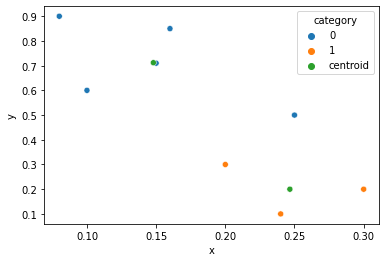

In [15]:
model.classify(clusters,centroids)